## Importing necessary libraries for Exploratory Data Analysis
### Pandas to manipulate dataframes and matplotlib for data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')

### Reading all the csv files

In [2]:
#Hot posts on r/India
hot_posts = pd.read_csv('hot_posts.csv')
#Newest posts on r/India as of April 13 2020
new_posts = pd.read_csv('new_posts.csv')
#Top most posts of all time on r/India
top_all_time = pd.read_csv('top_posts_all_time.csv')
#Top most posts of last year on r/India
top_all_year = pd.read_csv('top_posts_year.csv')

### This is what all of the dataframes look like.

In [3]:
hot_posts.head()

,id,subreddit,title,body,flair,url,score,num_comments,dated
0,fqqdsg,india,Coronavirus (COVID-19) Megathread - News and U...,###[Covid-19 Fundraisers & Donation Links](htt...,Coronavirus,https://www.reddit.com/r/India/comments/fqqdsg,366,9255,2020-03-29 03:10:33
1,fzub9j,india,"Announcing r/IndiaMeme, our own sub for memes ...",HELLO YOU NICE PEOPLE. WE GOT REALLY TIRED OF ...,Announcement,https://www.reddit.com/r/India/comments/fzub9j,143,50,2020-04-12 18:18:46
2,g000ic,india,My favorite lockdown pic so far!,NaN,Coronavirus,https://www.reddit.com/r/India/comments/g000ic,3248,84,2020-04-13 00:41:59
3,g0bfmo,india,Covid-19: Kamal Nath says lockdown was delayed...,NaN,Coronavirus,https://www.reddit.com/r/India/comments/g0bfmo,153,19,2020-04-13 11:56:58
4,g014wc,india,"Lost my Job, Sick Mother and Paralysed Dad, In...",Hi....It's really tough time for everyone. I r...,AskIndia,https://www.reddit.com/r/India/comments/g014wc,904,106,2020-04-13 01:42:28


## Information and data summary of all DataFrames
### To understand the type of data in the dataframes

In [4]:
# All hot posts from r/India
hot_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 9 columns):
id              787 non-null object
subreddit       787 non-null object
title           787 non-null object
body            253 non-null object
flair           768 non-null object
url             787 non-null object
score           787 non-null int64
num_comments    787 non-null int64
dated           787 non-null object
dtypes: int64(2), object(7)
memory usage: 55.5+ KB


In [5]:
# All new posts from r/India
new_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
id              888 non-null object
subreddit       888 non-null object
title           888 non-null object
body            295 non-null object
flair           869 non-null object
url             888 non-null object
score           888 non-null int64
num_comments    888 non-null int64
dated           888 non-null object
dtypes: int64(2), object(7)
memory usage: 62.6+ KB


### Null entries in body and flair columns of new_posts dataframe

In [6]:
# All-time top posts from r/India
top_all_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 9 columns):
id              988 non-null object
subreddit       988 non-null object
title           988 non-null object
body            66 non-null object
flair           987 non-null object
url             988 non-null object
score           988 non-null int64
num_comments    988 non-null int64
dated           988 non-null object
dtypes: int64(2), object(7)
memory usage: 69.6+ KB


### Null entries in body and flair column of top_all_time dataframes

In [7]:
# Last year (365 days) top posts from r/India
top_all_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
id              998 non-null object
subreddit       998 non-null object
title           998 non-null object
body            84 non-null object
flair           996 non-null object
url             998 non-null object
score           998 non-null int64
num_comments    998 non-null int64
dated           998 non-null object
dtypes: int64(2), object(7)
memory usage: 70.3+ KB


### Null entries in body and flair columns here as well


## We can see there are 2 columns which show multiple <strong>null</strong> entries in the data which is the <strong>body and flair columns</strong>. This signify that some posts may not necessarily have a body content and some posts cannot be categorized by their flair. Posts with no flair will be ignored in further analysis.

## Replacing all NULL values with empty string for body column in all dataframes

In [8]:
hot_posts['body'] = hot_posts['body'].fillna('')
new_posts['body'] = new_posts['body'].fillna('')
top_all_time['body'] = top_all_time['body'].fillna('')
top_all_year['body'] = top_all_year['body'].fillna('')

In [9]:
# All hot posts from r/India with no null tag in body
hot_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 9 columns):
id              787 non-null object
subreddit       787 non-null object
title           787 non-null object
body            787 non-null object
flair           768 non-null object
url             787 non-null object
score           787 non-null int64
num_comments    787 non-null int64
dated           787 non-null object
dtypes: int64(2), object(7)
memory usage: 55.5+ KB


### All the other dataframes will also have no null objects in their body tag.

### Some flairs have int type entries as we are unable to sort the list of flair column elements, so we'll fill null values and cast all the column values as string

In [10]:
hot_posts['flair'] = hot_posts['flair'].fillna('Unknown')
new_posts['flair'] = new_posts['flair'].fillna('Unknown')
top_all_time['flair'] = top_all_time['flair'].fillna('Unknown')
top_all_year['flair'] = top_all_year['flair'].fillna('Unknown')

hot_posts['flair'] = hot_posts['flair'].apply(str)
new_posts['flair'] = new_posts['flair'].apply(str)
top_all_time['flair'] = top_all_time['flair'].apply(str)
top_all_year['flair'] = top_all_year['flair'].apply(str)

## Now we'll see what all flairs the dataframes have, and their count

### 1. Hot Posts

In [11]:
for i, elem in enumerate(sorted(hot_posts['flair'].unique())):
    print(f'{i+1}. {elem} --------------- {hot_posts[hot_posts["flair"] == elem]["flair"].count()}')

1. Announcement --------------- 1
2. AskIndia --------------- 114
3. Business/Finance --------------- 9
4. CAA-NRC-NPR --------------- 3
5. Coronavirus --------------- 356
6. Food --------------- 11
7. Non-Political --------------- 125
8. Photography --------------- 6
9. Policy/Economy --------------- 34
10. Politics --------------- 84
11. Scheduled --------------- 8
12. Science/Technology --------------- 9
13. Sports --------------- 1
14. Unknown --------------- 19
15. Unverified --------------- 4
16. Unverified - Opinion --------------- 1
17. | Image Rule Violation | --------------- 1
18. | Repost | --------------- 1


### Plotting graph of posts per flair for hot posts

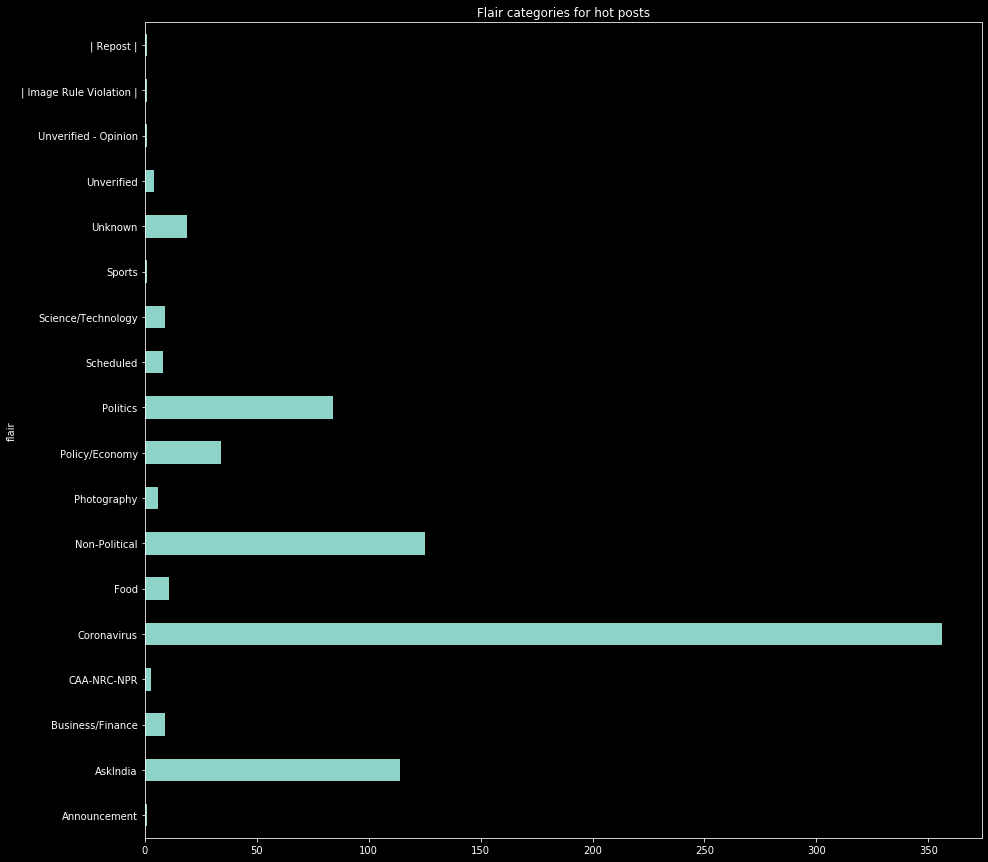

In [12]:
hot_posts.groupby(by='flair').count()['id'].plot(kind='barh', title='Flair categories for hot posts', figsize=(15,15))

### 2. New Posts

In [13]:
for i, elem in enumerate(sorted(new_posts['flair'].unique())):
    print(f'{i+1}. {elem} --------------- {new_posts[new_posts["flair"] == elem]["flair"].count()}')

1. Announcement --------------- 1
2. AskIndia --------------- 138
3. Business/Finance --------------- 11
4. CAA-NRC-NPR --------------- 3
5. Coronavirus --------------- 399
6. Food --------------- 11
7. Non-Political --------------- 138
8. Photography --------------- 8
9. Policy/Economy --------------- 41
10. Politics --------------- 93
11. Scheduled --------------- 8
12. Science/Technology --------------- 10
13. Sports --------------- 1
14. Unknown --------------- 19
15. Unverified --------------- 4
16. Unverified - Opinion --------------- 1
17. | Image Rule Violation | --------------- 1
18. | Repost | --------------- 1


### Plotting graph of posts per Flair for new posts

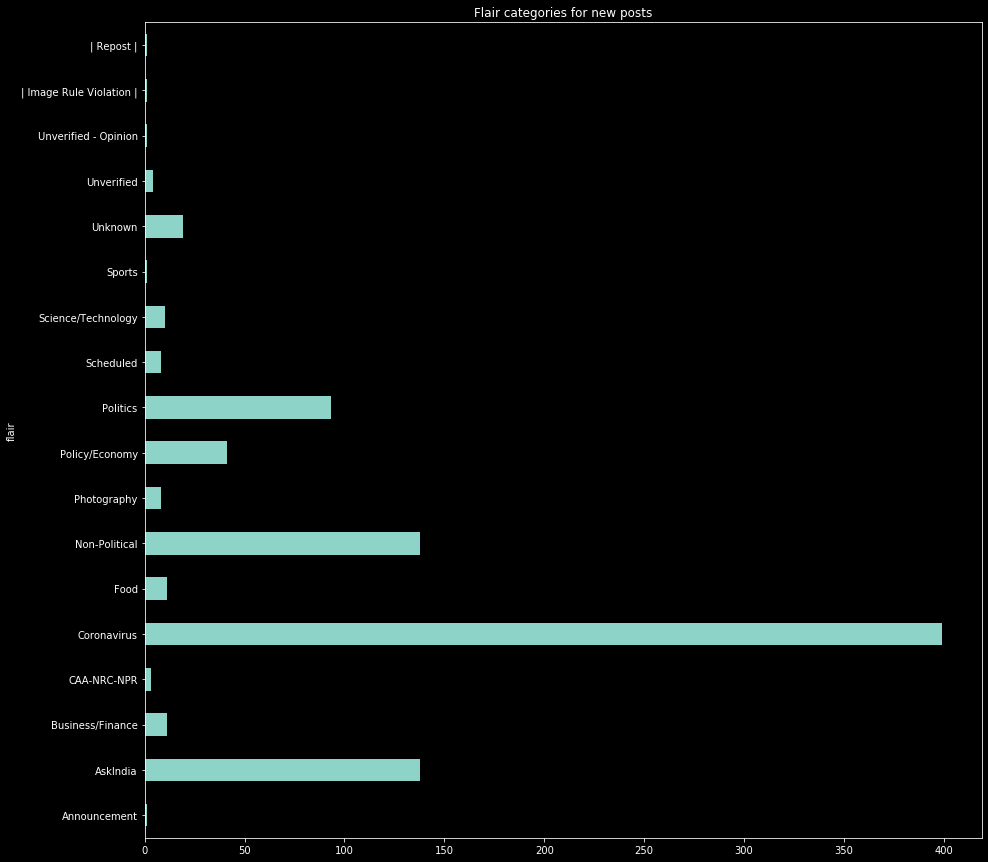

In [14]:
new_posts.groupby(by='flair').count()['id'].plot(kind='barh', title='Flair categories for new posts', figsize=(15,15))

### 3. All time top posts

In [15]:
for i, elem in enumerate(sorted(top_all_time['flair'].unique())):
    print(f'{i+1}. {elem} --------------- {top_all_time[top_all_time["flair"] == elem]["flair"].count()}')

1. /r/all --------------- 2
2. 40 Martyrs --------------- 1
3. AMA --------------- 2
4. AskIndia --------------- 10
5. Business/Finance --------------- 15
6. CAA-NRC --------------- 10
7. CAA-NRC-NPR --------------- 1
8. Coronavirus --------------- 39
9. Demonetization --------------- 2
10. Entertainment --------------- 1
11. Food --------------- 15
12. Goal Achieved!!! --------------- 1
13. Lifehacks --------------- 1
14. Misleading --------------- 1
15. Misleading Headline  --------------- 1
16. Non-Political --------------- 418
17. OC --------------- 1
18. Official Sadness Thread --------------- 1
19. On Internet Shutdowns --------------- 1
20. Original Comics --------------- 1
21. Photography --------------- 42
22. Policy & Economy --------------- 2
23. Policy/Economy --------------- 14
24. Policy/Economy -2017 Article  --------------- 1
25. Politics --------------- 301
26. Politics -- Source in comments --------------- 1
27. Politics [Megathread] --------------- 1
28. Scheduled --

### Plotting graph for posts per flair for all time top posts 

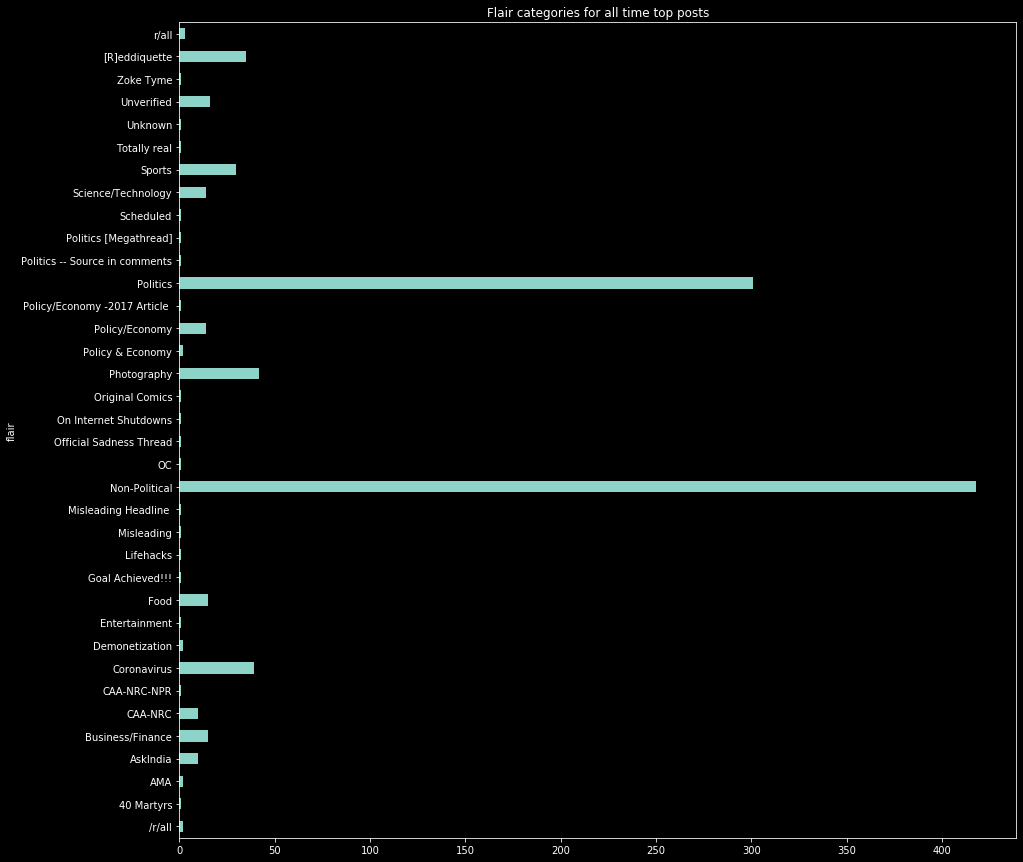

In [16]:
top_all_time.groupby(by='flair').count()['id'].plot(kind='barh', title='Flair categories for all time top posts', figsize=(15,15))

### 4. All year top posts

In [17]:
for i, elem in enumerate(sorted(top_all_year['flair'].unique())):
    print(f'{i+1}. {elem} --------------- {top_all_year[top_all_year["flair"] == elem]["flair"].count()}')

1. AMA --------------- 2
2. AskIndia --------------- 13
3. Business/Finance --------------- 8
4. CAA-NRC --------------- 18
5. CAA-NRC-NPR --------------- 3
6. Coronavirus --------------- 66
7. Demonetization --------------- 1
8. Food --------------- 16
9. Megathread --------------- 1
10. Misleading --------------- 1
11. Misleading Headline  --------------- 1
12. NSFL - Deaths Warning --------------- 1
13. Non-Political --------------- 298
14. OC --------------- 1
15. Official Sadness Thread --------------- 1
16. On Internet Shutdowns --------------- 1
17. Photography --------------- 39
18. Policy/Economy --------------- 19
19. Policy/Economy -2017 Article  --------------- 1
20. Politics --------------- 429
21. Politics -- Source in comments --------------- 1
22. Politics [Megathread] --------------- 1
23. Scheduled --------------- 2
24. Science/Technology --------------- 16
25. Source in comments --------------- 1
26. Sports --------------- 17
27. Unknown --------------- 2
28. Unverif

## We can plot graphs for this data

In [18]:
top_all_year.groupby(by='flair').count()['id']

flair
AMA                                 2
AskIndia                           13
Business/Finance                    8
CAA-NRC                            18
CAA-NRC-NPR                         3
Coronavirus                        66
Demonetization                      1
Food                               16
Megathread                          1
Misleading                          1
Misleading Headline                 1
NSFL - Deaths Warning               1
Non-Political                     298
OC                                  1
Official Sadness Thread             1
On Internet Shutdowns               1
Photography                        39
Policy/Economy                     19
Policy/Economy -2017 Article        1
Politics                          429
Politics -- Source in comments      1
Politics [Megathread]               1
Scheduled                           2
Science/Technology                 16
Source in comments                  1
Sports                             17
Unknow

### Plotting graph for posts per flair for all year top posts 

/home/yatharthmathur/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yatharthmathur/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yatharthmathur/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yatharthmathur/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yatharthmathur/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yatharthmathur/anaconda3/lib/pytho

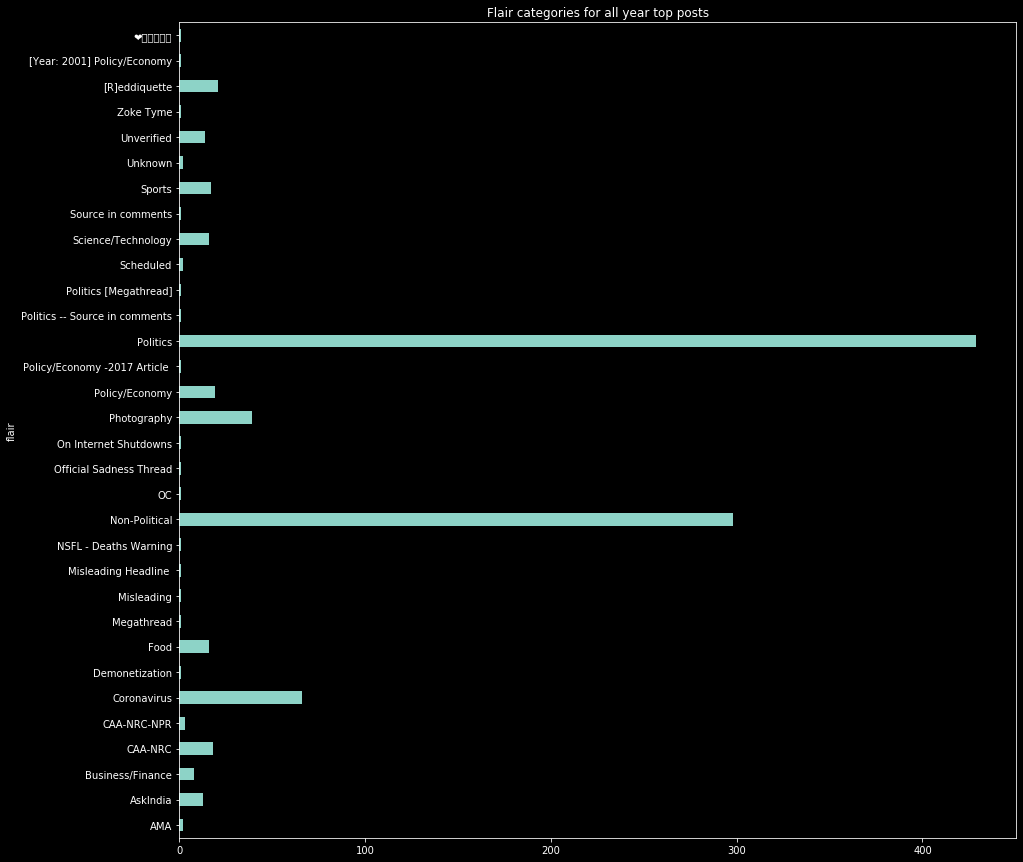

In [19]:
top_all_year.groupby(by='flair').count()['id'].plot(kind='barh', title='Flair categories for all year top posts', figsize=(15,15))

## We can find the flairs which generally have the most scores
### Each category is grouped by its flair and the total score is calculated (for each flair)

### Graphs below demonstrate the post popularity per flair for each category

## 1. Hot posts

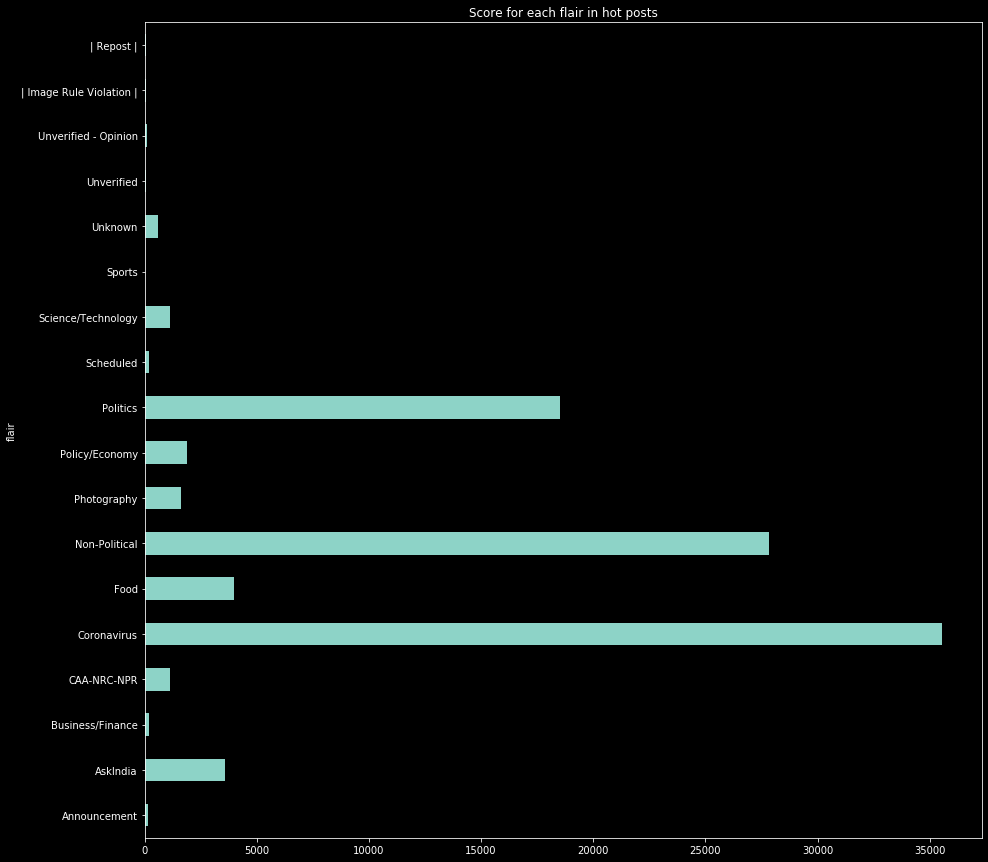

In [20]:
hot_posts.groupby(by='flair').sum()['score'].plot( kind='barh', title='Score for each flair in hot posts', figsize=(15,15))

## 2. New Posts

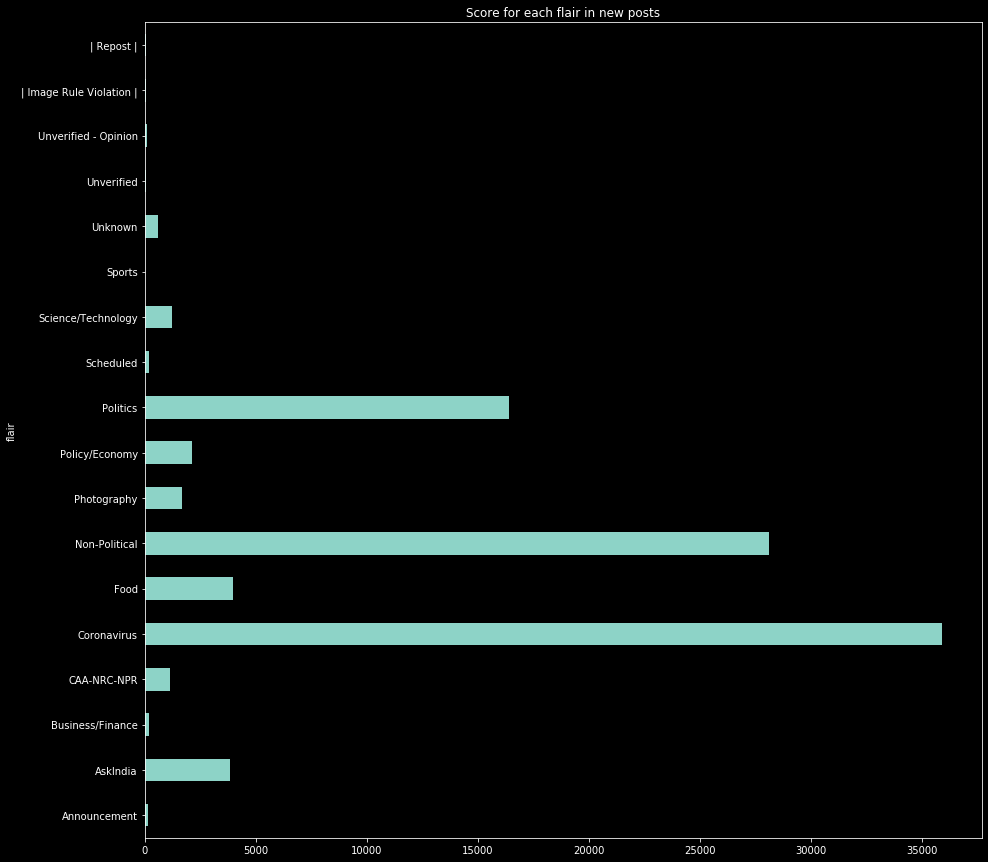

In [21]:
new_posts.groupby(by='flair').sum()['score'].plot(kind='barh', title='Score for each flair in new posts', figsize=(15,15))

## 3. All time top posts

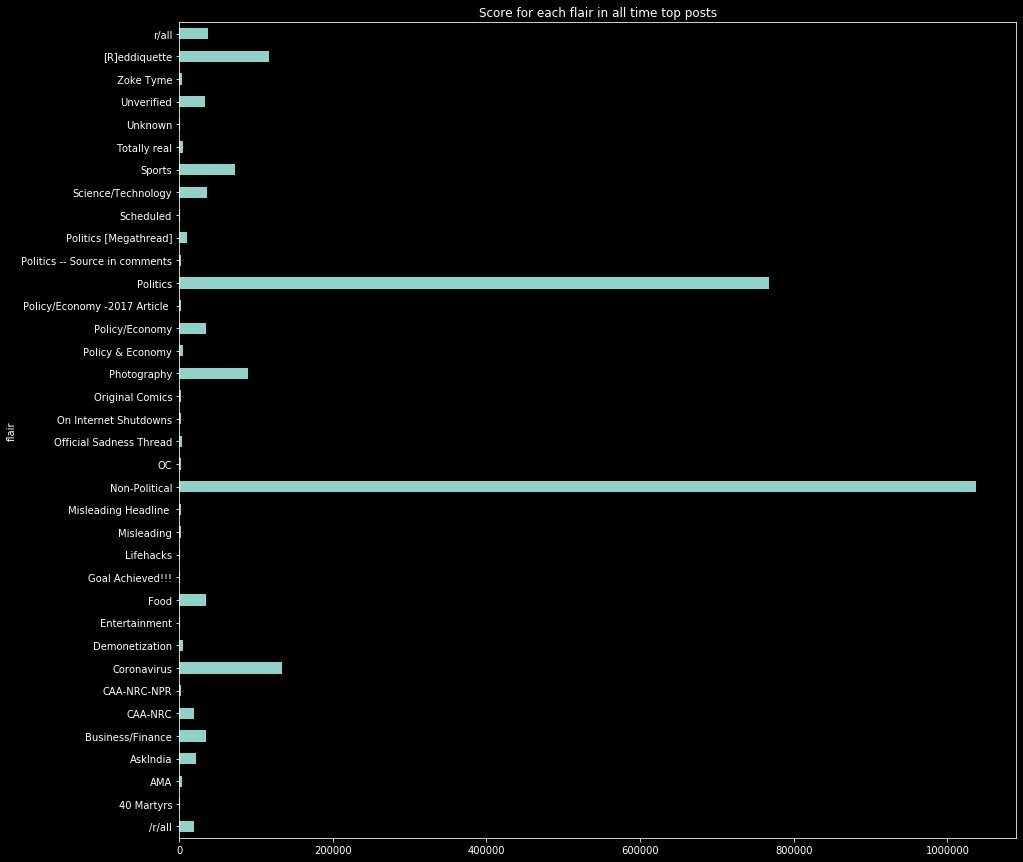

In [22]:
top_all_time.groupby(by='flair').sum()['score'].plot(kind='barh', title='Score for each flair in all time top posts', figsize=(15,15))

## 4. Top Posts (Year)

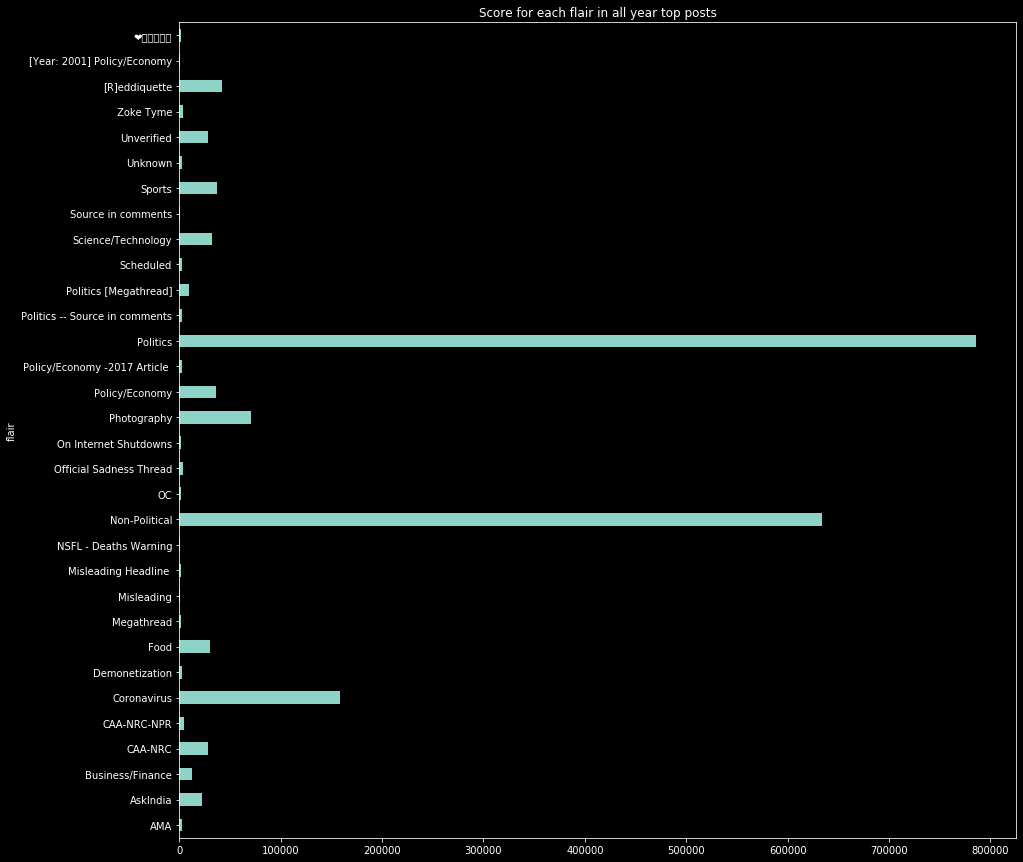

In [23]:
top_all_year.groupby(by='flair').sum()['score'].plot(kind='barh', title='Score for each flair in all year top posts', figsize=(15,15))

## We can see that recently most of the posts are about Corona Virus and it is attracting a lot of attention/scores and comments. But all time Political and Non-Political posts are the most popular. Even coronavirus is pretty popular in all time data.

### Importing datetime library to manipulate time data, to plot timeseries data

In [24]:
from datetime import datetime

### Function to cast the dated column into day of the year format. This will help us plot data on a daily basis.

In [25]:
def get_day(date):
    date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date.strftime('%Y-%m-%d')

### Function to cast the dated column into year-month format. This will help us plot data on a monthly basis.

In [26]:
def get_year_month(date):
    date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date.strftime('%Y-%m')

### Function to cast the dated column into year format

In [27]:
def get_year(date):
    date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date.strftime('%Y')

### Applying the function over the column yields this result

In [28]:
hot_posts['dated'].apply(get_day)

0      2020-03-29
1      2020-04-12
2      2020-04-13
3      2020-04-13
4      2020-04-13
          ...    
782    2020-04-09
783    2020-04-10
784    2020-04-09
785    2020-04-09
786    2020-04-10
Name: dated, Length: 787, dtype: object

### Making a copy of the dataframes

In [29]:
hot_posts_ = hot_posts.copy()
new_posts_ = new_posts.copy()
top_all_time_ = top_all_time.copy()
top_all_year_ = top_all_year.copy()

In [30]:
hot_posts_['dated'] = hot_posts_['dated'].apply(get_day)
new_posts_['dated'] = new_posts_['dated'].apply(get_day)
top_all_time_['dated'] = top_all_time_['dated'].apply(get_year_month)
top_all_year_['dated'] = top_all_year_['dated'].apply(get_year_month)

In [31]:
hot_posts_.head()['dated']

0    2020-03-29
1    2020-04-12
2    2020-04-13
3    2020-04-13
4    2020-04-13
Name: dated, dtype: object

### Plotting data to see post count with respect to time

### Post count for hot_posts dataset with respect to the number of day of the year

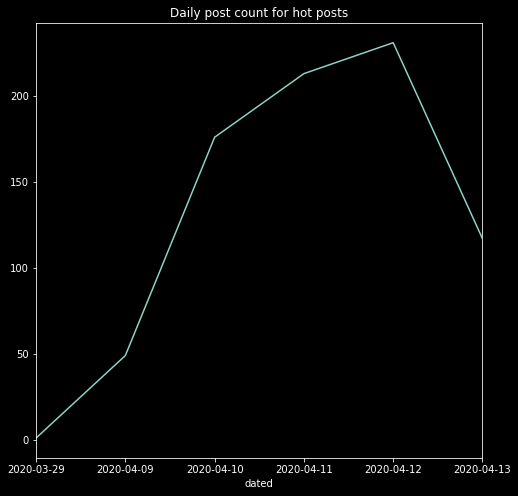

In [32]:
hot_posts_.groupby(by='dated').count()['id'].plot(kind='line', title='Daily post count for hot posts', figsize=(8,8))

### Post count for new_posts dataset with respect to the number of day of the year

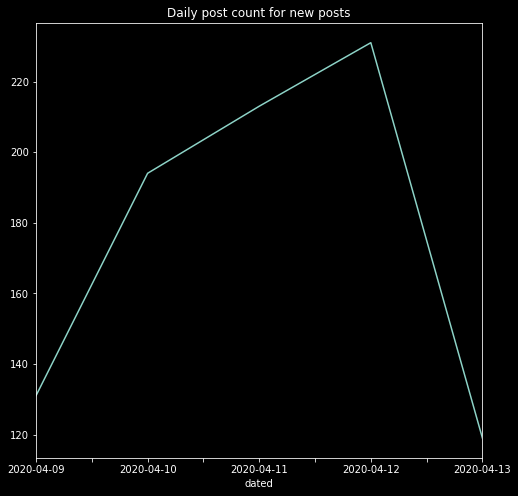

In [33]:
new_posts_.groupby(by='dated').count()['id'].plot(kind='line', title='Daily post count for new posts', figsize=(8,8))

### Post count for top_posts_all_time dataset with respect to the Month and Year

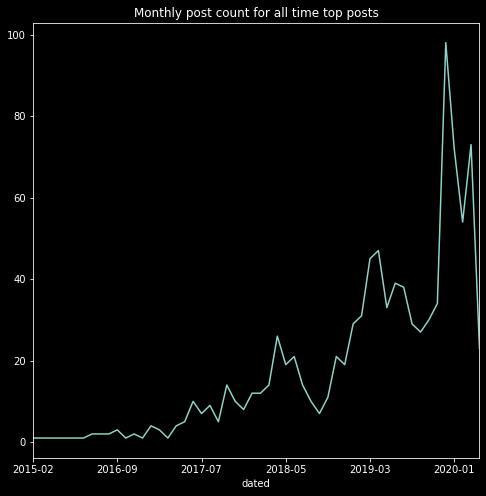

In [34]:
top_all_time_.groupby(by='dated').count()['id'].plot(kind='line', title='Monthly post count for all time top posts', figsize=(8,8))

### Post count for top_posts_year dataset with respect to the Month and Year

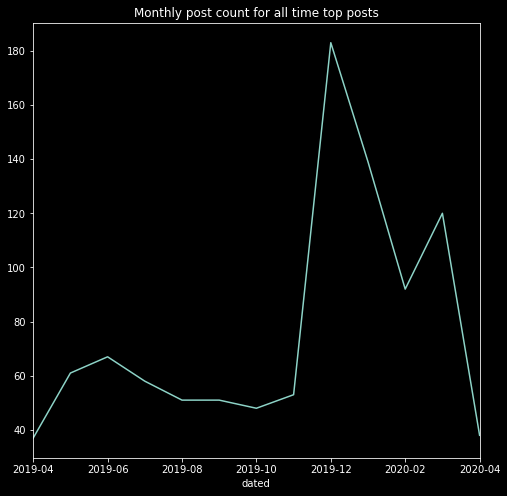

In [35]:
top_all_year_.groupby(by='dated').count()['id'].plot(kind='line', title='Monthly post count for all time top posts', figsize=(8,8))

### Plotting graphs of posts per flair with respect to time

### Obtaining the count of each flair with respect to a certain date(daily) for hot data

In [36]:
hot_posts_ = hot_posts.copy()
hot_posts_['dated'] = hot_posts_['dated'].apply(get_day)

In [37]:
hot_posts_.groupby(by=['dated','flair']).count()['id'].values

array([  1,   3,  27,   1,  11,   1,   2,   3,   1,  24,   2,  85,  24,
         1,  10,  24,   2,   1,   2,   1,  33,   3,   1,  92,   3,  34,
         1,   7,  24,   2,   4,   6,   2,   1,   1,  34,   2,   2, 100,
         5,  37,   3,  11,  20,   2,   2,   1,   8,   1,   1,   1,  20,
         2,  51,   2,  19,   4,  13,   1,   2,   3])

### Obtaining the dates and flairs

In [43]:
#hot_posts_.groupby(by=['dated','flair']).count()['id'].keys()

### Creating a grouped data for flair, time and the respective count

In [39]:
grouped_all_time = pd.DataFrame()

In [40]:
dates, flair = list(zip(*hot_posts_.groupby(by=['dated','flair']).count()['id'].keys()))

In [41]:
grouped_all_time['flair'] = flair
grouped_all_time['dated'] = dates
grouped_all_time['count'] = hot_posts_.groupby(by=['dated','flair']).count()['id'].values

### Pivoting the data such that the index is the date, and the count of each flair is the value on each index

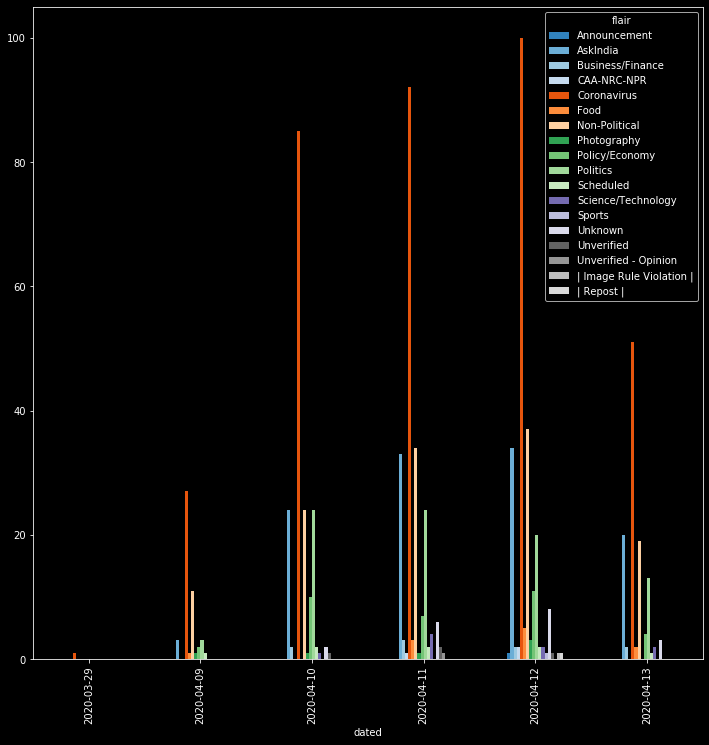

In [42]:
grouped_all_time.pivot(columns='flair', index='dated', values='count').plot(kind='bar', figsize=(12,12), colormap='tab20c')